Top features correlated with electricity prices:
∅ DE/LU neighbours [€/MWh] Original resolutions    0.947588
Netherlands [€/MWh] Original resolutions           0.946912
Denmark 1 [€/MWh] Original resolutions             0.916323
Czech Republic [€/MWh] Original resolutions        0.912776
Austria [€/MWh] Original resolutions               0.911766
Belgium [€/MWh] Original resolutions               0.910114
Denmark 2 [€/MWh] Original resolutions             0.863247
France [€/MWh] Original resolutions                0.784921
Poland [€/MWh] Original resolutions                0.768401
Switzerland [€/MWh] Original resolutions           0.744303
Name: Germany/Luxembourg [€/MWh] Original resolutions, dtype: float64


c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\virtual_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\Elite\AppData\Local\Temp\ipykernel_23904\3913285259.py:51: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


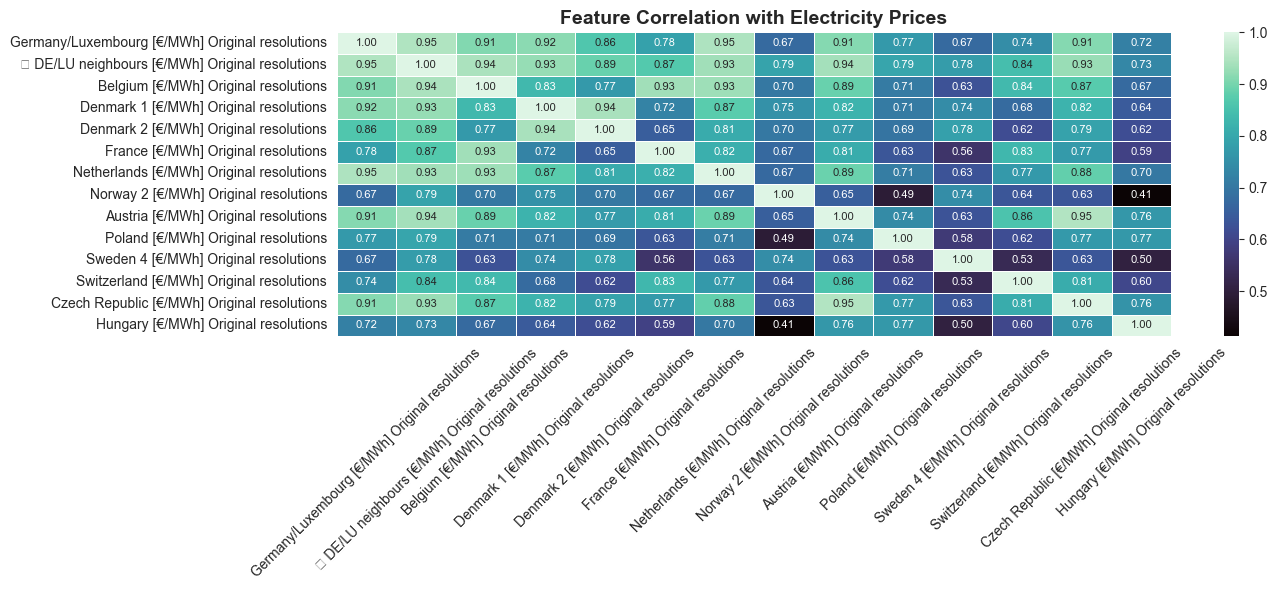

Plot saved: ../plots\electricity_price_feature_correlation.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths
PLOTS_DIR = "../plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Load dataset
file_path = "../data/refined_files/refined_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
df = pd.read_csv(file_path, delimiter=",")

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"])

# Drop non-numeric columns (e.g., date/time columns)
df_numeric = df.select_dtypes(include=["number"])

# Choose target electricity price column
target_column = "Germany/Luxembourg [€/MWh] Original resolutions"

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Get correlation values with electricity prices
price_correlations = corr_matrix[target_column].drop(target_column).abs().sort_values(ascending=False)

# Print top correlated features
print("Top features correlated with electricity prices:")
print(price_correlations.head(10))  

# Apply seaborn style
sns.set_style("whitegrid")

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    corr_matrix, annot=True, cmap="mako", fmt=".2f", linewidths=0.5, cbar=True,
    annot_kws={"size": 8}
)

# Refining plot elements
plt.title("Feature Correlation with Electricity Prices", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save refined figure with an improved filename
plot_filename = "electricity_price_feature_correlation.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Plot saved: {os.path.join(PLOTS_DIR, plot_filename)}")
